In [1]:
import os
import pandas as pd
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the root directory of the project as credit-mlops
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print(ROOT_DIR)

/workspaces/credit-mlops


In [3]:
# Read the processed data
df = pd.read_csv(os.path.join(ROOT_DIR, 'data', 'processed', 'featurized_data.csv'))
df.head(2)

,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,latent_10
0,-0.094877,-0.784100,-0.221964,-0.433870,0.048943,0.427667,0.086400,0.381546,0.191282,0.183097
1,0.029871,-0.641415,0.318985,-0.607431,-0.149696,0.148877,0.048803,0.307927,0.295072,0.080698


## Clustering

#### DBSCAN

In [4]:


# Assuming you have your reduced data in 'reduced_data' (a DataFrame or a 2D array)

# Create a DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the reduced data
clusters = dbscan.fit_predict(df)

# 'clusters' will contain the cluster labels for each data point
# -1 represents noise points (outliers) that do not belong to any cluster

#### HDBSCAN

In [5]:
# Create an HDBSCAN object
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5, cluster_selection_epsilon=0.5)

# Fit the HDBSCAN model to the reduced data
clusters = hdbscan_clusterer.fit_predict(df)

## Metrics

In [6]:
# Assuming you have your reduced data in 'df' and cluster labels in 'clusters'

# Compute the silhouette score
silhouette_avg = silhouette_score(df, clusters)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.0583100452837886


## Plot

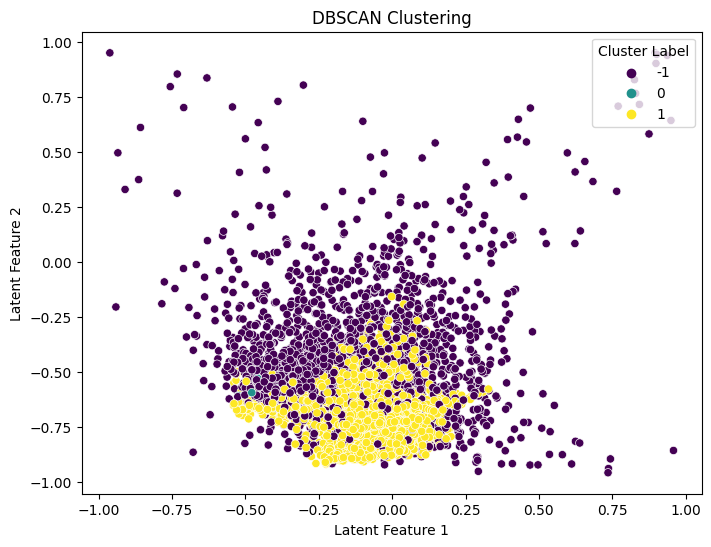

<Figure size 640x480 with 0 Axes>

In [7]:
# Create a scatter plot of the reduced data with different colors for each cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['latent_1'], y=df['latent_2'], hue=clusters, palette='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Latent Feature 1")
plt.ylabel("Latent Feature 2")
plt.legend(title='Cluster Label', loc='upper right')
plt.show()

# Save clustering plot
plt.savefig(os.path.join(ROOT_DIR, 'reports', 'figures', 'clusters.png'))